<a href="https://colab.research.google.com/github/bgohrani/FeedForward_Networks/blob/main/Learning_Algorithm_scalar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Scalar Back Propagation
Here we'll see the implementation of the learning algorithm, and visualize its process

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.colors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , mean_squared_error
from tqdm import tqdm_notebook
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs
from sklearn.compose import ColumnTransformer 

#Importing essential libraries

In [ ]:
#Class for FF Network with updating w1

class FFNetworkw1:

  def __init__(self):
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
  
  def model(self,x):
    return 1.0/(1.0+ np.exp(-x)) 
  
  def forward_pass(self,x):
    self.x1, self.x2 = x
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 = self.model(self.a1)
    self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.h2 = self.model(self.a2)
    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
    self.h3 = self.model(self.a3)
    return self.h3

  def grad(self, x, y):
    self.forward_pass(x)
    self.dw1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x1

  def train(self,X,Y,epochs =1, lr = 1, show_loss = 0):
    W = [] 
    loss = []
    for i in tqdm_notebook(range(epochs)):
      dw1= [0]
      for x,y in zip(X,Y):
        self.grad(x,y)
        dw1 += self.dw1
      W.append(dw1)
      m = X.shape[1]
      self.w1 -= lr*dw1/m
      #print(self.w1)
      
      #W.append(self.w1)


      Y_pred = self.predict(X)
      loss.append(mean_squared_error(Y_pred, Y))
    
    if show_loss ==1:
      plt.plot(loss)
      plt.xlabel('Epochs')
      plt.ylabel('Mean squared Error Loss')
      plt.show()
      plt.plot(W)
      plt.xlabel('Epochs')
      plt.ylabel('self.w1')
      plt.show()
    
  def predict(self,X):
    Y_pred_temp = []

    for x in X:
      y_temp = self.forward_pass(x)
      Y_pred_temp.append(y_temp)

    Y_pred = np.asarray(Y_pred_temp)
    return Y_pred    

#We first have our initialize function which sets all w values as random and b as 0
#A model function returns the sigmoid function value of the given input as usual 
#We then have a forward pass function which takes in the given input and weights 
#This will then give the output of the basic neural network of 3 neurons
#This is followed by a grad function which takes the output of the network
#This then uses the loss function and returns the change in w and b for given x
#We then have the train function which calculates dw for all x 
#This dw is then added to self.w and db is added to self.b
#A loss function is then added and the output, Mean Squared Loss is plotted if needed
#Finally there is a predict function which takes input X and gives the output with trained values


#Here only w1 is updated to study how one weight contributes 

(1000, 2) (1000,)


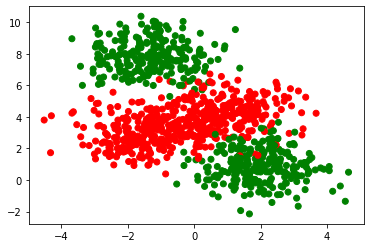

In [ ]:
cmap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])
data, labels = make_blobs(n_samples =1000, n_features =2, centers = 4, random_state=0)
print(data.shape , labels.shape)
labels_orig = labels
labels = np.mod(labels_orig,2)
plt.scatter(data[:,0],data[:,1],c = labels, cmap = cmap1)
plt.show()

#We have our own colormap to use and data is generated after which it is classified into 2 categories

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, stratify = labels, random_state = 0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

#Splitting for training and testing 

(750, 2) (250, 2) (750,) (250,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


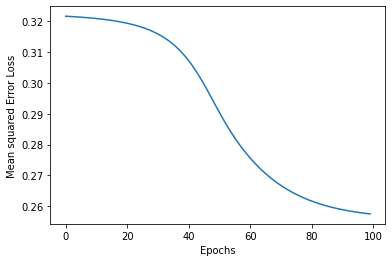

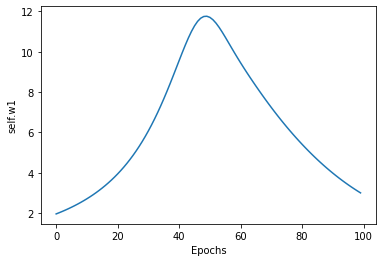

In [ ]:
f1 = FFNetworkw1()
f1.train(X_train,Y_train,epochs=100, lr=0.01, show_loss=1)
#Training the model

In [ ]:
#Class for FF Network with updating all weights 

class FFNetworkAll:

  def __init__(self):
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
    self.W_record = {}
  def model(self,x):
    return 1.0/(1.0+ np.exp(-x)) 
  
  def forward_pass(self,x):
    self.x1, self.x2 = x
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 = self.model(self.a1)
    self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.h2 = self.model(self.a2)
    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
    self.h3 = self.model(self.a3)
    return self.h3

  def grad(self, x, y):
    self.forward_pass(x)
    self.dw1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x1
    self.dw2 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x2
    self.dw3 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h2*(1-self.h2) * self.x1
    self.dw4 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h2*(1-self.h2) * self.x2
    self.db1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1)
    
    self.dw5 = (self.h3-y) * self.h3*(1-self.h3) * self.h1
    self.dw6 = (self.h3-y) * self.h3*(1-self.h3) * self.h2    
    self.db2 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h2*(1-self.h2) 
   
    self.db3 = (self.h3-y) * self.h3*(1-self.h3) 
    

  def train(self,X,Y,epochs =1, lr = 1, initialise=1, show_loss = 0):
    if initialise ==1:
      self.w1 = np.random.randn()
      self.w2 = np.random.randn()
      self.w3 = np.random.randn()
      self.w4 = np.random.randn()
      self.w5 = np.random.randn()
      self.w6 = np.random.randn()
      self.b1 = 0
      self.b2 = 0
      self.b3 = 0
      
    loss = []
    for i in tqdm_notebook(range(epochs)):
      dw1,dw2,dw3,dw4,dw5,dw6,db1,db2,db3 = [0]*9
      for x,y in zip(X,Y):
        self.grad(x,y)
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3

      m = X.shape[1]
      self.w1 -= lr*dw1/m
      self.w2 -= lr*dw2/m
      self.w3 -= lr*dw3/m
      self.w4 -= lr*dw4/m
      self.w5 -= lr*dw5/m
      self.w6 -= lr*dw6/m
      self.b1 -= lr*db1/m
      self.b2 -= lr*db2/m
      self.b3 -= lr*db3/m

      Y_pred = self.predict(X)
      loss.append(mean_squared_error(Y_pred, Y))
      self.W_record[i] = np.asarray([[0,self.b3,self.w5,self.w6,0,0],[self.b1,self.w1,self.w2,self.w3,self.w4,self.b2]])

    if show_loss ==1:
      plt.plot(loss)
      plt.xlabel('Epochs')
      plt.ylabel('Mean squared Error Loss')
      plt.show()

    

  
  def predict_h1(self,X):
    Y_pred = []
    for x in X:
      self.forward_pass(x)
      y_temp = self.h1
      Y_pred.append(y_temp)
    return np.asarray(Y_pred)
  
  def predict_h2(self,X):
    Y_pred = []
    for x in X:
      self.forward_pass(x)
      y_temp = self.h2
      Y_pred.append(y_temp)
    return np.asarray(Y_pred)
  
  def predict_h3(self,X):
    Y_pred = []
    for x in X:
      self.forward_pass(x)
      y_temp = self.h3
      Y_pred.append(y_temp)
    return np.asarray(Y_pred)

  def predict(self,X):
    Y_pred_temp = []
    for x in X:
      y_temp = self.forward_pass(x)
      Y_pred_temp.append(y_temp)

    Y_pred = np.asarray(Y_pred_temp)
    return Y_pred    

#Here we update all the weights to have the same scalar network as before

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


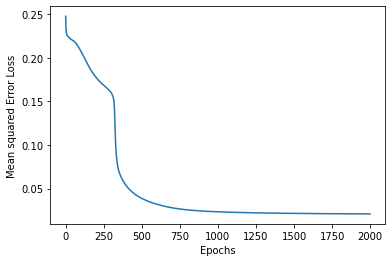

In [ ]:
f1 = FFNetworkAll()
f1.train(X_train,Y_train,epochs=2000,initialise=1, lr=0.01, show_loss=1)
#Training the data

In [ ]:
def plot_neuron_outputs(X,Y):
  X1 = np.arange((X[:,0].min()-0.5),(X[:,0].max()+0.5),0.01)
  X2 = np.arange((X[:,1].min()-0.5),(X[:,1].max()+0.5),0.01)
  XX1,XX2 = np.meshgrid(X1,X2)
  YY = {}
  for i in range(3):
    YY[i] = np.zeros([XX1.shape[0],XX1.shape[1]])
  for i in tqdm_notebook(range(XX1.shape[0])):
    for j in range(XX1.shape[1]):
      x_temp = np.asarray([[X1[j],X2[i]]])
      YY[0][i,j] = f1.predict_h1(x_temp)
      YY[1][i,j] = f1.predict_h2(x_temp)
      YY[2][i,j] = f1.predict_h3(x_temp)
  for i in range(3):
    plt.contourf(XX1,XX2,YY[i],cmap = cmap1, alpha = 0.5)
    plt.scatter(X[:,0],X[:,1],c=Y,cmap=cmap1)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title("Prediction of the neuron h"+str(i+1))
    plt.show()

#Here we wish to study how each neuron is contributing to the classification done by the network 
#First we take the minimum and maximum values of the input x1 and x2, to find the range of the graph
#After which we take the output on these values by the first, second and final neuron
#These are shown in 3 different plots 
#Each plot also shows the training data with colours as the true classification

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


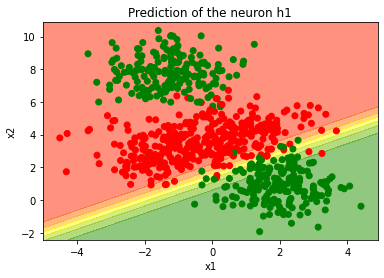

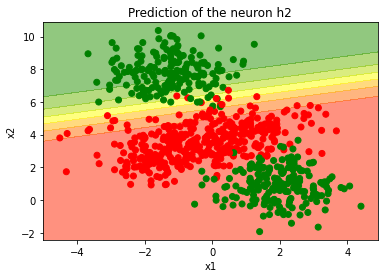

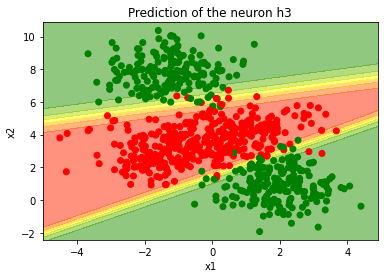

In [ ]:
plot_neuron_outputs(X_train,Y_train)

In [ ]:
for i in range(2000):
  if i%40 ==0:
    sns.heatmap(f1.W_record[i],cmap=cmap1,annot=True,linecolor='black',square=True,vmin=-5,vmax=5, linewidths=.5)
    plt.title("Epoch"+str(i))
    plt.show()

#To see the change in all the weights as the learning progresses, we can also record all the values of the weights 
#This is done for each epoch and plotted as a heatmap
# Run code to see the output

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
fig, ax = plt.subplots()
def animate(i):
  ax.clear()
  sns.heatmap(ax=ax,data=f1.W_record[i*40],cmap=cmap1,annot=True,linecolor='black',square=True,vmin=-5,vmax=5, linewidths=.5,cbar = False)
  ax.set_title("Epoch"+str(i*40)) 


interval = 2#in seconds     
anim = animation.FuncAnimation(fig,animate,50,interval=interval*1e+2,blit=False)

#Here we can use this code as a general template to make animations with plots
#The animations are always made of plots in loops
#The catch here is to have lists which contain data of each variable to be plotted of each iteration

HTML(anim.to_html5_video())
#final animation video

#We can use the template of animations and also make a video of the heatmaps made
#Given as animation_1 in repository

In [ ]:
#FF Neural Network for Multi class classification (Scalar)


class FFNetwork_Multi:

  def __init__(self):
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.w7 = np.random.randn()
    self.w8 = np.random.randn()
    self.w9 = np.random.randn()
    self.w10 = np.random.randn()
    self.w11 = np.random.randn()
    self.w12 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
    self.b4 = 0
    self.b5 = 0
    self.b6 = 0
    
    self.W_record = {}
  def model(self,x):
    return 1.0/(1.0+ np.exp(-x)) 

  def cross_entropy(self,Y,Y_pred):
    y_temp = np.multiply(Y,Y_pred)
    y_temp = y_temp[y_temp != 0]
    y_temp1 = -np.log(y_temp)
    return np.mean(y_temp1)
  
  def forward_pass(self,x):
    self.x1, self.x2 = x
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 = self.model(self.a1)
    self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.h2 = self.model(self.a2)
    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
    self.a4 = self.w7*self.h1 + self.w8*self.h2 + self.b4
    self.a5 = self.w9*self.h1 + self.w10*self.h2 + self.b5
    self.a6 = self.w11*self.h1 + self.w12*self.h2 + self.b6
    sum_exps = np.exp(self.a3) + np.exp(self.a4) + np.exp(self.a5) + np.exp(self.a6)
    self.h3 = np.exp(self.a3)/sum_exps
    self.h4 = np.exp(self.a4)/sum_exps
    self.h5 = np.exp(self.a5)/sum_exps
    self.h6 = np.exp(self.a6)/sum_exps
    return np.asarray([self.h3,self.h4,self.h5,self.h6])

  def grad(self, x, y):
    self.forward_pass(x)
    self.y1,self.y2,self.y3,self.y4 = y

    self.da3 = (self.h3-self.y1)
    self.da4 = (self.h4-self.y2)
    self.da5 = (self.h5-self.y3)
    self.da6 = (self.h6-self.y4)
    
    self.dw5 = self.da3 * self.h1
    self.dw6 = self.da3*self.h2
    self.db3 = self.da3

    self.dw7 = self.da4*self.h1
    self.dw8 = self.da4*self.h2
    self.db4 = self.da4

    self.dw9 = self.da5*self.h1
    self.dw10 = self.da5*self.h2
    self.db5 = self.da5

    self.dw11 = self.da6*self.h1
    self.dw12 = self.da6*self.h2
    self.db6 = self.da6

    self.dh1 = (self.da3*self.w5) + (self.da4*self.w7) + (self.da5*self.w9) + (self.da6*self.w11)
    self.da1 = self.dh1*self.h1*(1-self.h1)
    
    self.dw1 = self.da1*self.x1
    self.dw2 = self.da1*self.x2
    self.db1 = self.da1
    
    self.dh2 = (self.da3*self.w6) + (self.da4*self.w8) + (self.da5*self.w10) + (self.da6*self.w12)
    self.da2 = self.dh2*self.h2*(1-self.h2)
    
    self.dw3 = self.da2*self.x1
    self.dw4 = self.da2*self.x2
    self. db2 = self.da2

    

  def train(self,X,Y,epochs =1, lr = 1, initialise=1, show_loss = 0):
    if initialise ==1:
      self.w1 = np.random.randn()
      self.w2 = np.random.randn()
      self.w3 = np.random.randn()
      self.w4 = np.random.randn()
      self.w5 = np.random.randn()
      self.w6 = np.random.randn()
      self.w7 = np.random.randn()
      self.w8 = np.random.randn()
      self.w9 = np.random.randn()
      self.w10 = np.random.randn()
      self.w11 = np.random.randn()
      self.w12 = np.random.randn()
      self.b1 = 0
      self.b2 = 0
      self.b3 = 0
      self.b4 = 0
      self.b5 = 0
      self.b6 = 0
      
    loss = []
    for i in tqdm_notebook(range(epochs)):
      dw1,dw2,dw3,dw4,dw5,dw6,dw7,dw8,dw9,dw10,dw11,dw12,db1,db2,db3,db4,db5,db6 = [0]*18
      for x,y in zip(X,Y):
        self.grad(x,y)
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        dw7 += self.dw7
        dw8 += self.dw8
        dw9 += self.dw9
        dw10 += self.dw10
        dw11 += self.dw11
        dw12 += self.dw12

        db1 += self.db1
        db2 += self.db2
        db3 += self.db3
        db4 += self.db4
        db5 += self.db5
        db6 += self.db6


      m = X.shape[1]
      self.w1 -= lr*dw1/m
      self.w2 -= lr*dw2/m
      self.w3 -= lr*dw3/m
      self.w4 -= lr*dw4/m
      self.w5 -= lr*dw5/m
      self.w6 -= lr*dw6/m
      self.w7 -= lr*dw7/m
      self.w8 -= lr*dw8/m
      self.w9 -= lr*dw9/m
      self.w10 -= lr*dw10/m
      self.w11 -= lr*dw11/m
      self.w12 -= lr*dw12/m
      
      
      self.b1 -= lr*db1/m
      self.b2 -= lr*db2/m
      self.b3 -= lr*db3/m
      self.b4 -= lr*db4/m
      self.b5 -= lr*db5/m
      self.b6 -= lr*db6/m

      Y_pred = self.predict(X)
      loss.append(self.cross_entropy(Y,Y_pred))
      self.W_record[i] = np.asarray([[self.b3,self.w5,self.w6,self.b4,self.w7,self.w8,self.b5,self.w9,self.w10,self.b6,self.w11,self.w12],[0,0,0,self.b1,self.w1,self.w2,self.b2,self.w3,self.w4,0,0,0]])

    if show_loss ==1:
      plt.plot(loss)
      plt.xlabel('Epochs')
      plt.ylabel('Mean squared Error Loss')
      plt.show()


  def predict(self,X):
    Y_pred_temp = []
    for x in X:
      y_temp = self.forward_pass(x)
      Y_pred_temp.append(y_temp)

    Y_pred = np.asarray(Y_pred_temp).squeeze()
    return Y_pred

  def predict_h1(self,X):
    Y_pred = []
    for x in X:
      self.forward_pass(x)
      y_temp = self.h1
      Y_pred.append(y_temp)
    return np.asarray(Y_pred)    
  
  def predict_h2(self,X):
    Y_pred = []
    for x in X:
      self.forward_pass(x)
      y_temp = self.h2
      Y_pred.append(y_temp)
    return np.asarray(Y_pred)
 
  def predict_h3(self,X):
    Y_pred = []
    for x in X:
      self.forward_pass(x)
      y_temp = self.h3
      Y_pred.append(y_temp)
    return np.asarray(Y_pred)
 
  def predict_h4(self,X):
    Y_pred = []
    for x in X:
      self.forward_pass(x)
      y_temp = self.h4
      Y_pred.append(y_temp)
    return np.asarray(Y_pred)
 
  def predict_h5(self,X):
    Y_pred = []
    for x in X:
      self.forward_pass(x)
      y_temp = self.h5
      Y_pred.append(y_temp)
    return np.asarray(Y_pred)
 
  def predict_h6(self,X):
    Y_pred = []
    for x in X:
      self.forward_pass(x)
      y_temp = self.h6
      Y_pred.append(y_temp)
    return np.asarray(Y_pred)

  def predict_final(self,X):
    Y_pred_temp = []
    for x in X:
      y_temp = self.forward_pass(x)
      Y_pred_temp.append((np.argmax(y_temp)*np.max(y_temp)))
    return np.asarray(Y_pred_temp)


#Here we write the code for a bigger network, correspondingly also functions to visualize each neuron's contribution



In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(data, labels_orig, stratify = labels_orig, random_state = 0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

#Splitting for testing and training 

(750, 2) (250, 2) (750,) (250,)


In [ ]:
Y_train1 = Y_train.reshape(-1,1)
onehotencoder = OneHotEncoder() 
Y_train2 = onehotencoder.fit_transform(Y_train1).toarray()

#This section of code converts the data into one hot encoded form 
#Class 0 is represented by [1,0,0,0]
#Class 1 is represented by [0,1,0,0]
#Class 2 is represented by [0,0,1,0]
#Class 3 is represented by [0,0,0,1]
#OneHotEncoder takes only 2D arrays hence reshape is used
#fit_transform then converts the given data into required form
#Result is array (matrix) with 4 columns 

Y_test1 = Y_test.reshape(-1,1)
onehotencoder = OneHotEncoder() 
Y_test2 = onehotencoder.fit_transform(Y_test1).toarray()

#Similar method for Y_test


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:116: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


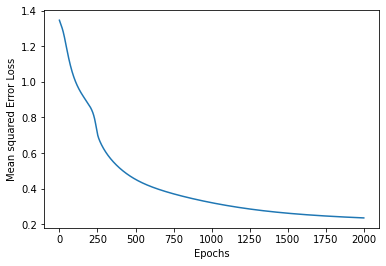

In [ ]:
f1 = FFNetwork_Multi()
f1.train(X_train,Y_train2,epochs=2000,lr=0.001,initialise=1,show_loss=1)
#Training on the data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(18,10))

def animate(i):
  ax.clear()
  sns.heatmap(ax=ax,data=f1.W_record[i*40],cmap=cmap1,annot=True,linecolor='black',square=True,vmin=-5,vmax=5, linewidths=.5,cbar = False)
  ax.set_title("Epoch"+str(i*40)) 


interval = 2#in seconds     
anim = animation.FuncAnimation(fig,animate,50,interval=interval*1e+2,blit=False)

#Here we can use this code as a general template to make animations with plots
#The animations are always made of plots in loops
#The catch here is to have lists which contain data of each variable to be plotted of each iteration

HTML(anim.to_html5_video())
#final animation video

#Animation for all the weights changing with heatmaps as before 
#Given as animation_2 in repository

In [ ]:
Y_pred_train1 = f1.predict(X_train)
Y_pred_test1 = f1.predict(X_test)

Y_pred_train = np.argmax(Y_pred_train1,axis=1)
Y_pred_test = np.argmax(Y_pred_test1,axis =1)

#This is done to reverse the data from one hot encoded form, the index of the max value is taken 
#Now the output consists of only one column

train_accuracy = accuracy_score(Y_pred_train,Y_train)
test_accuracy = accuracy_score(Y_pred_test,Y_test)

print(train_accuracy,test_accuracy)

#Checking for accuracy

0.9173333333333333 0.94


In [ ]:
def plot_neuron_outputs2(X,Y):
  X1 = np.arange((X[:,0].min()-0.5),(X[:,0].max()+0.5),0.01)
  X2 = np.arange((X[:,1].min()-0.5),(X[:,1].max()+0.5),0.01)
  XX1,XX2 = np.meshgrid(X1,X2)
  fig, axs = plt.subplots(7,1,figsize=[8,42])
  YY = {}
  for i in range(7):
    YY[i] = np.zeros([XX1.shape[0],XX1.shape[1]])
  for i in tqdm_notebook(range(XX1.shape[0])):
    for j in range(XX1.shape[1]):
      x_temp = np.asarray([[X1[j],X2[i]]])
      YY[0][i,j] = f1.predict_h1(x_temp)
      YY[1][i,j] = f1.predict_h2(x_temp)
      YY[2][i,j] = f1.predict_h3(x_temp)
      YY[3][i,j] = f1.predict_h4(x_temp)
      YY[4][i,j] = f1.predict_h5(x_temp)
      YY[5][i,j] = f1.predict_h6(x_temp)
      YY[6][i,j] = f1.predict_final(x_temp)
  for i in range(7):
    axs[i].contourf(XX1,XX2,YY[i],cmap = cmap1, alpha = 0.5)
    axs[i].scatter(X[:,0],X[:,1],c=Y,cmap=cmap1)
    axs[i].set_title("Prediction of the neuron h"+str(i+1))


#Similar function to see the working of each neuron, but for the larger network 
#Additional code to see the  output of the network
#In the class itself, the output is converted back from one hot encoded form, with probability 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


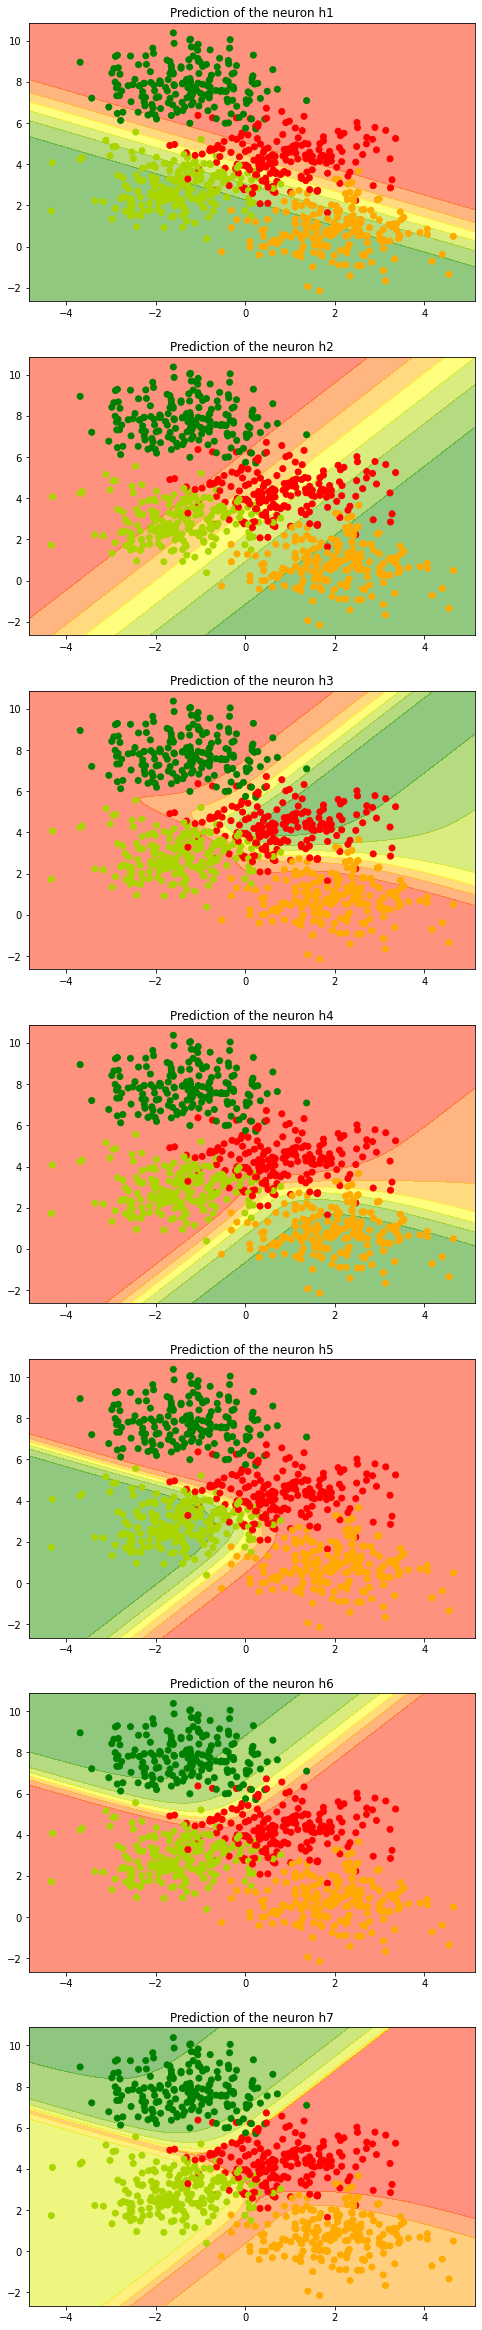

In [ ]:
plot_neuron_outputs2(X_train,Y_train)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
  
  
f1 = FFNetworkAll()
fig, axs = plt.subplots(3,1,figsize = (10,15))
def animate(i):
  axs[0].clear()
  axs[1].clear()
  axs[2].clear()
  f1.train(X_train,Y_train,epochs=100,lr = 0.01,initialise= 0,show_loss=0 )
  plot_neuron_outputs(X_train,Y_train) 

interval = 1.5#in seconds     
anim = animation.FuncAnimation(fig,animate,15,interval=interval*1e+2,blit=False)

HTML(anim.to_html5_video())
#We animate the plots we made above at different checkpoints in our model, trying to see how learning progresses, for the binary classification network
#final animation video, will be generated on running, given as animation_3 in repository


In [ ]:
# import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
  
  
f1 = FFNetwork_Multi()
fig, axs = plt.subplots(7,1,figsize = (10,40))
def animate(i):
  for j in range(7):
    axs[j].clear()
  f1.train(X_train,Y_train2,epochs=100,lr = 0.01,initialise= 0,show_loss=0 )
  plot_neuron_outputs2(X_train,Y_train) 

interval = 2#in seconds     
anim = animation.FuncAnimation(fig,animate,5,interval=interval*1e+2,blit=False)

HTML(anim.to_html5_video())
#We animate the plots we made above at different checkpoints in our model, trying to see how learning progresses, for the multi class classification network
#final animation video, generated on running, given as animation_4 in repository